In [3]:
import glob
import math
import os
import errno
import sys

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.measure as ski
import re

from pathlib import Path
cur_dir = Path().resolve()
sys.path.append(str(cur_dir) + "/module")

In [4]:
import configparser

config_ini = configparser.ConfigParser()
ini_path = 'config.ini'

if not os.path.exists(ini_path):
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENONET), ini_path)
config_ini.read(ini_path, encoding='utf-8')

var1 = config_ini['DEFAULT']['User']
var2 = config_ini.get('DEFAULT', 'User')

print(f'var1 : {var1}')
print(f'var2 : {var2}')

var1 : Laplace
var2 : Laplace


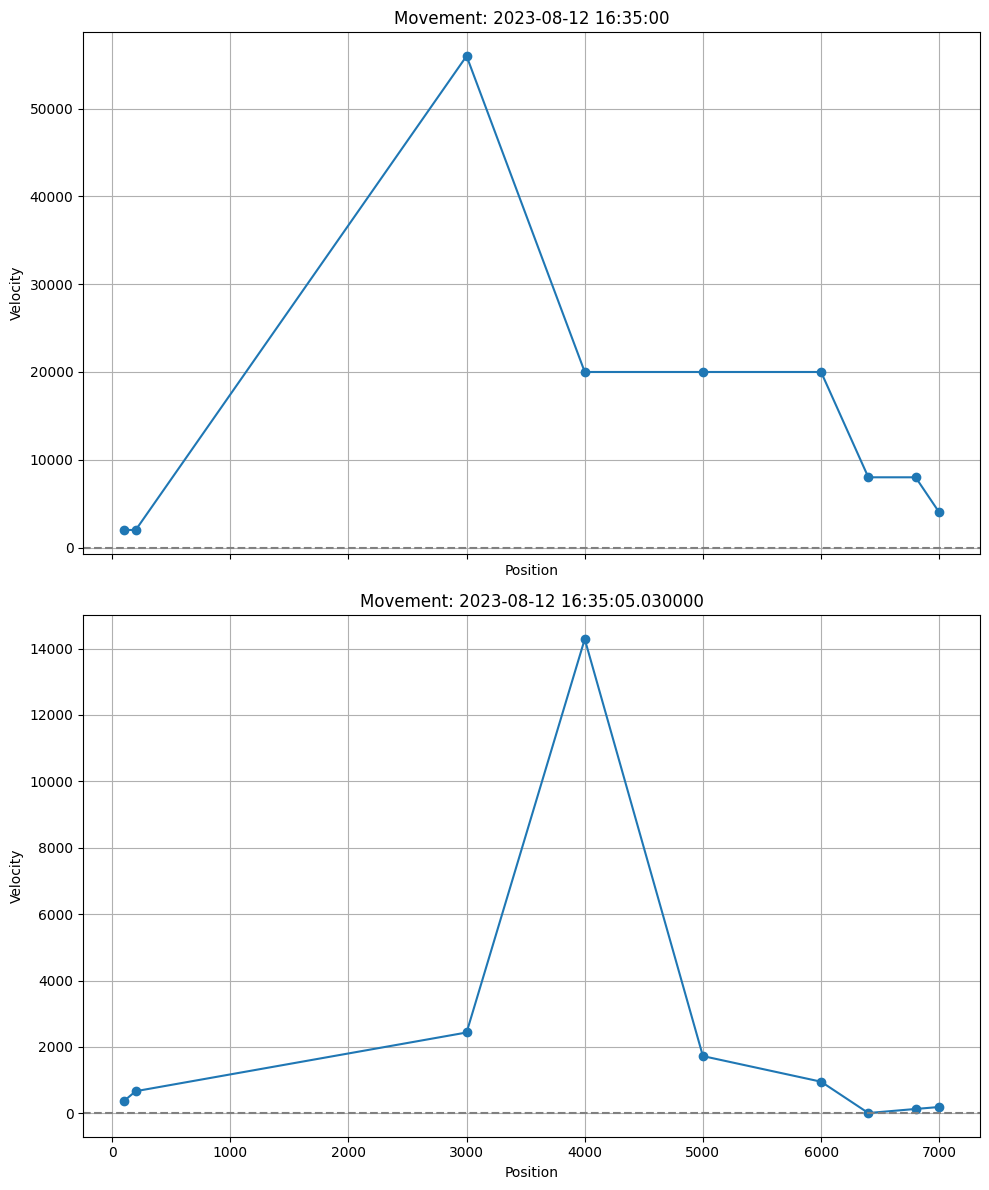

In [52]:
csv_filepath = r'C:\work\Pyhton\jupyter\graph_create\csv\movement.csv'
data = pd.read_csv(csv_filepath, parse_dates=['datetime'])

# 時刻を秒単位の経過時間に変換
# data['time_seconds'] = (data['datetime'] - data['datetime'].iloc[0]).dt.total_seconds()

# "Start"から"Stop"までのデータごとに分割してリストに追加
movements = []
movement_data = []
for index, row in data.iterrows():
    if row['State'] == 'Start':
        movement_data = []  # 新しい移動のデータを格納するリストを初期化
    movement_data.append(row)  # データをリストに追加
    if row['State'] == 'Stop':
        movement_df = pd.DataFrame(movement_data)  # 移動のデータをDataFrame化
        
        # 日付と時刻のデータをdatetimeオブジェクトに変換
        movement_df['datetime'] = pd.to_datetime(movement_df['datetime'])
        
        # 速度を計算
        movement_df['velocity'] = movement_df['position'].diff() / (movement_df['datetime'].diff().dt.total_seconds())

        # 加速度を計算
        movement_df['acceleration'] = movement_df['velocity'].diff() / (movement_df['datetime'].diff().dt.total_seconds())
        
        
        movements.append(movement_df)  # DataFrameをリストに追加

fig, axes = plt.subplots(len(movements), 1, figsize=(10, 6 * len(movements)), sharex=True)
for move_data, ax in zip(movements, axes):
    ax.plot(move_data['position'], move_data['velocity'], marker='o')
    ax.set_title(f"Movement: {move_data['datetime'].iloc[0]}")
    ax.set_xlabel('Position')
    ax.set_ylabel('Velocity')
    ax.grid(True)
    
    ax.axhline(y=0, color='gray', linestyle='--')  # 速度0の参照線

plt.tight_layout()  # プロットのレイアウトを調整
plt.show()